<a href="https://colab.research.google.com/github/zxxoxnee/Machine-Learning/blob/master/Decision_Tree%EB%A1%9C_%ED%83%80%EC%9D%B4%ED%83%80%EB%8B%89_%EC%83%9D%EC%A1%B4%EC%9E%90_%EC%98%88%EC%B8%A1%ED%95%B4%EB%B3%B4%EA%B8%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1912년 타이타닉 사고의 생존자를 예측해보자!
### [ 데이터 설명 ]
- 891명의 승객에 대한 데이터.  생존여부 / 좌석 등급 / 성별 / 나이 / 일행 / 자녀 / 운임 등의 feature

|Feature|	Definition|	Value|
|------|---------|------------|
|survived|	생존 여부|	0 = No, 1 = Yes|
|pclass|	티겟 등급 (1등석, 2등석, 3등석)|	1 = 1st, 2 = 2nd, 3 = 3rd|
|sex|	성별	| male 남성,  female 여성
|age|	나이  |	((숫자))
|sibsp|	함께 탑승한 배우자, 형제자매의 수 합	|   ((숫자))
|parch|	함께 탑승한 부모님, 자녀의 수 합	|   ((숫자))
|fare|	운임 요금 (티켓 가격)	|   ((숫자))
|embarked|	출항지 (한글자)	|C = Cherbourg, Q = Queenstown, S = Southampton|
|class|	티켓 등급 (단어로)	|  First, Second, Third
|who|	남성/여성/아이 구분	|    man, woman, child
|adult_male|	성인 남성인지의 여부	|    True, False
|deck|	선박에서 배정받은 좌석의 구역	|    A, B, C, D, E, F, G, 빈 값
|embark_town|	출항지 (풀네임)	|   ((도시이름))
|alive|	생존 여부	|    yes, no
|alone|	혼자인지 여부	|    True, False

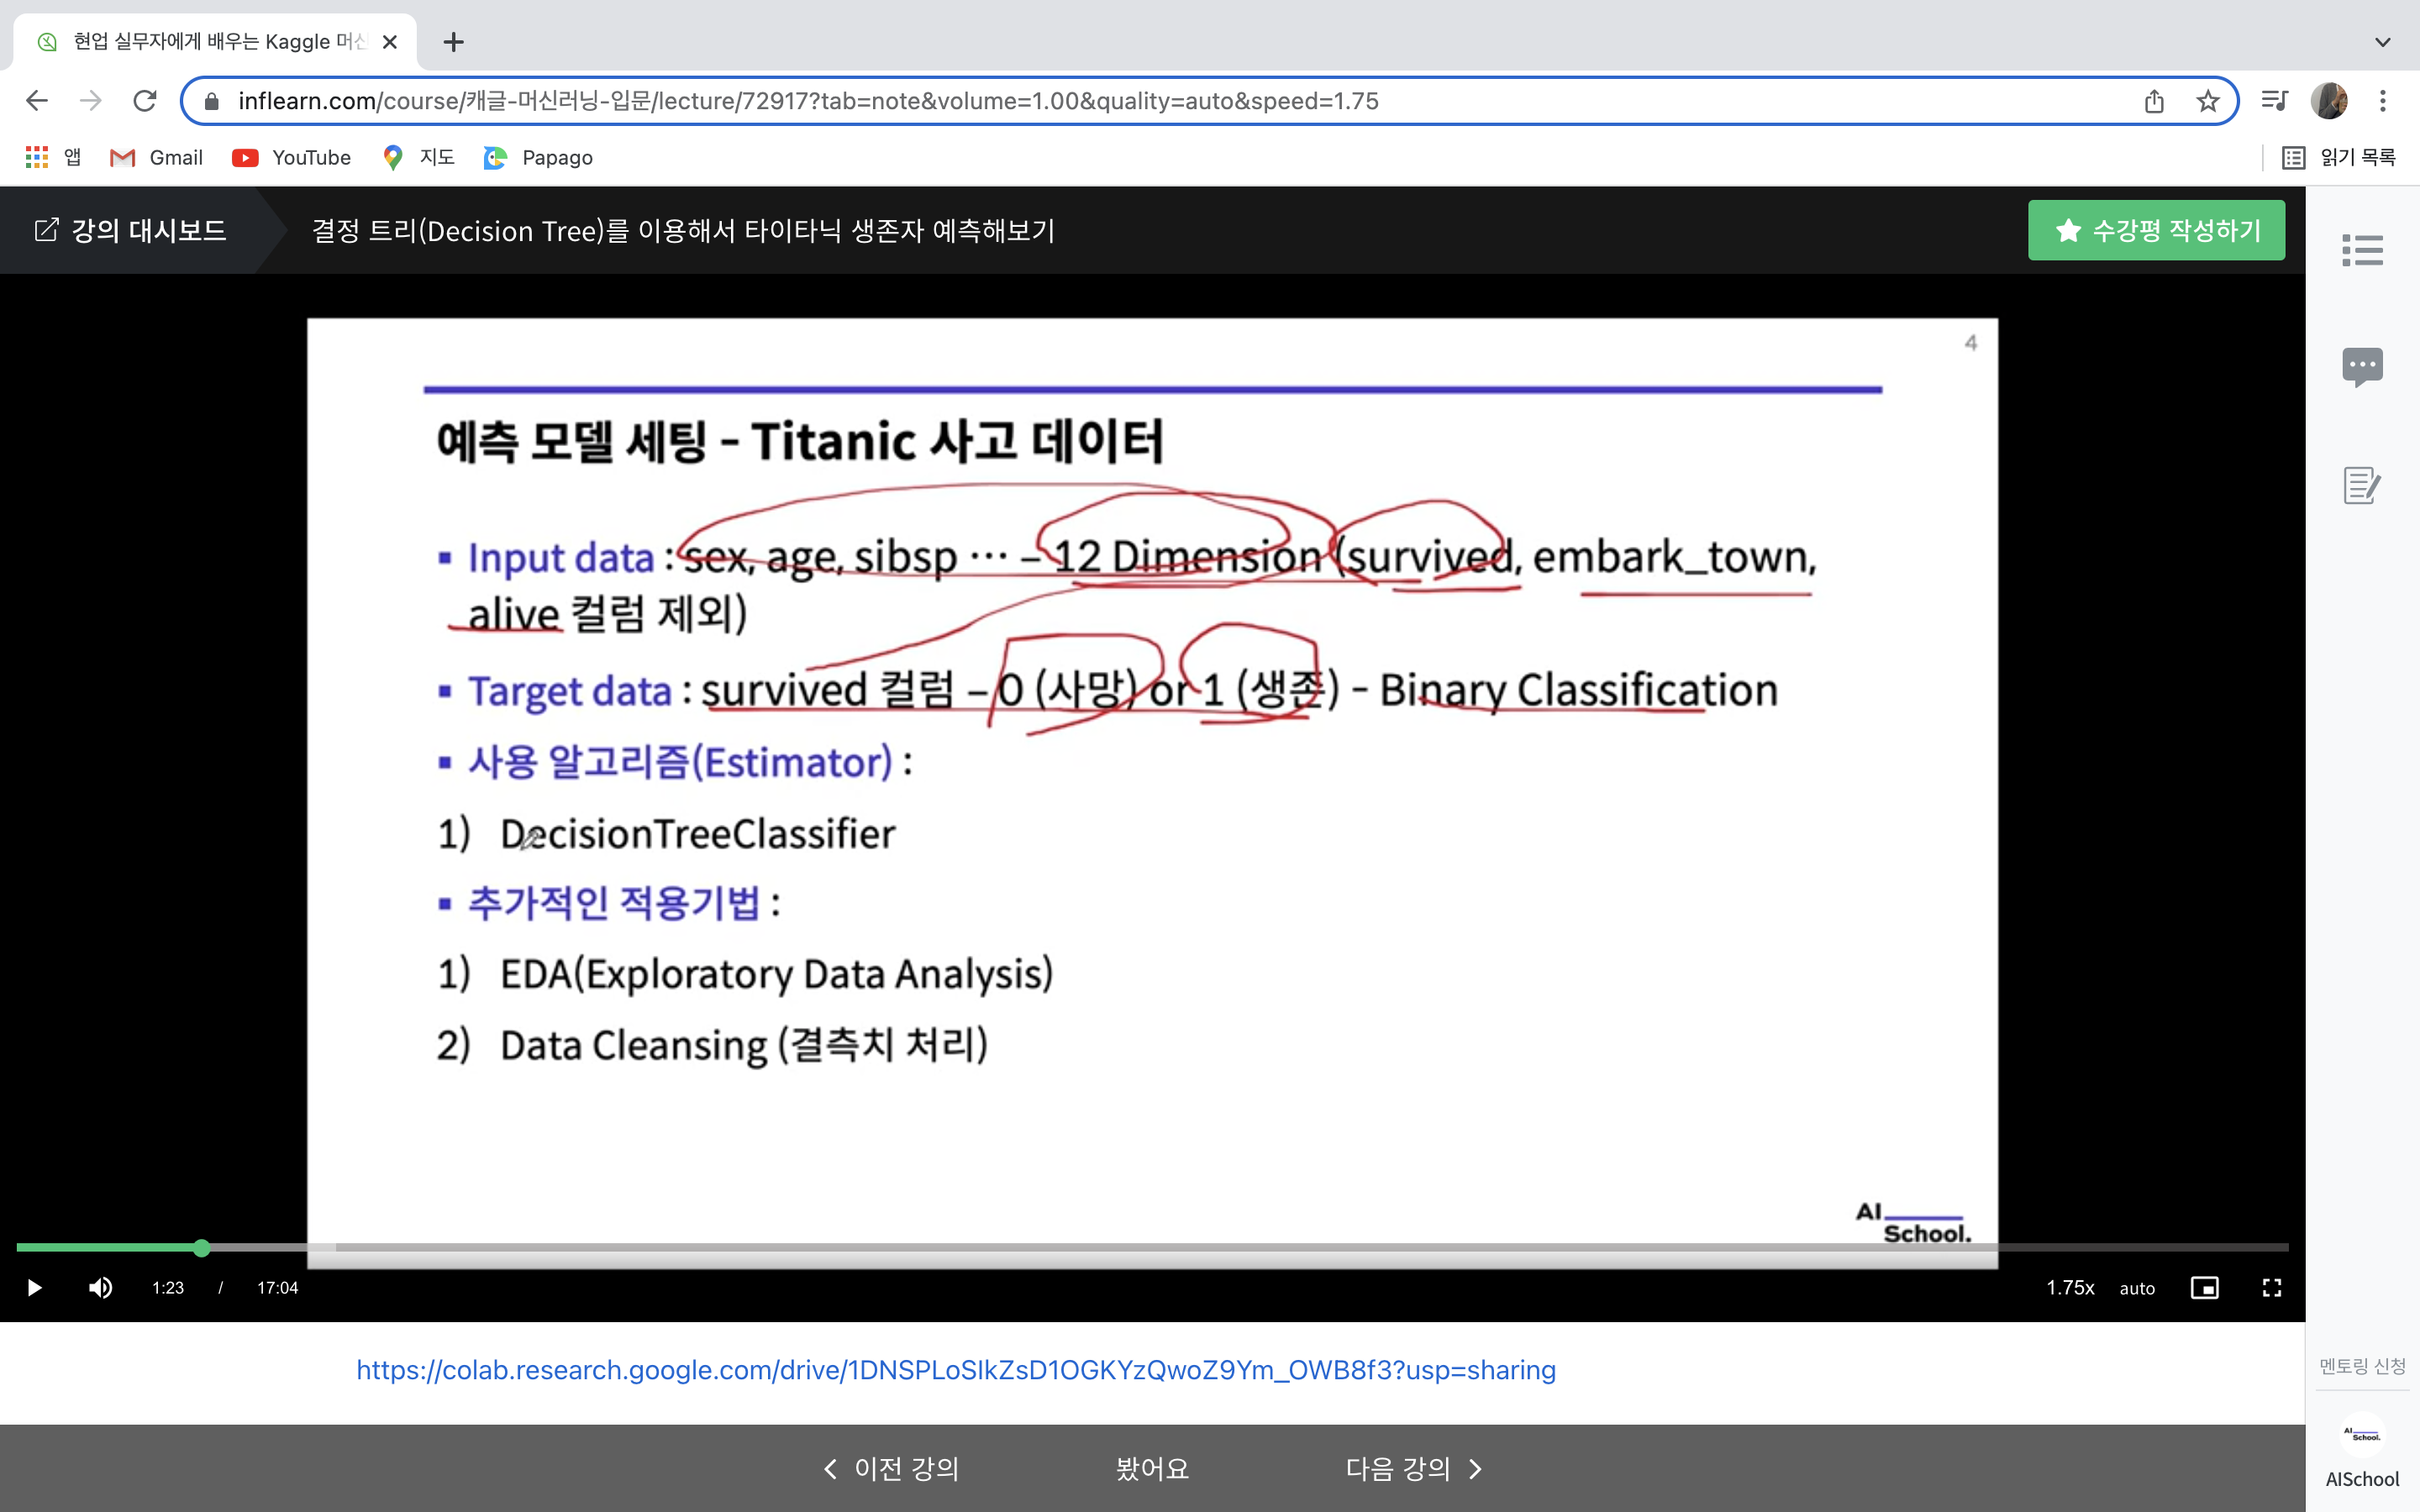

# 라이브러리 임포트

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# 데이터 불러오기

In [2]:
titanic_df = sns.load_dataset('titanic')

In [3]:
titanic_df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


# Part1. EDA 탐색적 데이터 분석 수행하기

In [4]:
# .info() 함수로 데이터 컬럼별 타입(자료형), 값이 있는 행(Non-Null)의 갯수 등을 알 수 있습니다.
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


범주형 컬럼과, 수치형 컬럼으로 나누어서 리스트를 만듭니다. (추후 분석 시 반복되는 코드를 줄일 수 있어요)  
* 범주형(categorical) 데이터는 값이 [1, 2, 3], ["내부", "외부"]와 같이 몇 가지 분류로 한정되는 데이터 입니다.
* 수치형(numerical) 데이터는 값이 1,2,3,5,..., 1.2, 4.51, 3.1415와 같이 숫자 축으로 무한히 위치할 수 있는 데이터 입니다.

In [5]:
categorical_cols = ["sex", "embarked", "class", "who", "adult_male", "deck", "embark_town", "alive", "alone"]
numerical_cols = ["age","sibsp","parch","fare"]

#### 데이터의 통계량 살펴보기  
.describe() 함수로 각 열에 대한 대략적인 통계 값들을 볼 수 있습니다. (평균, 상위 25/50/75% 값, 최대/최소 값 등)

In [6]:
titanic_df.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
# .value_counts()를 통해 각 컬럼별로 몇 개의 row가 있는지 셀 수 있습니다
for col in categorical_cols:
    print(col + " 카운트::")
    print(titanic_df.loc[:, col].value_counts())
    print()

sex 카운트::
male      577
female    314
Name: sex, dtype: int64

embarked 카운트::
S    644
C    168
Q     77
Name: embarked, dtype: int64

class 카운트::
Third     491
First     216
Second    184
Name: class, dtype: int64

who 카운트::
man      537
woman    271
child     83
Name: who, dtype: int64

adult_male 카운트::
True     537
False    354
Name: adult_male, dtype: int64

deck 카운트::
C    59
B    47
D    33
E    32
A    15
F    13
G     4
Name: deck, dtype: int64

embark_town 카운트::
Southampton    644
Cherbourg      168
Queenstown      77
Name: embark_town, dtype: int64

alive 카운트::
no     549
yes    342
Name: alive, dtype: int64

alone 카운트::
True     537
False    354
Name: alone, dtype: int64



#### 데이터의 분포 눈으로 살펴보기

수치형 컬럼들의 분포를 그려봅시다. 통계량은 boxplot으로 살펴보고, 분포는 histplot으로 그립니다.  
* 본격적으로 반복문을 사용해 볼까요? 이 코드에서는 반복문을 이용하여 여러개의 차트를 그립니다.
* plt.subplots를 통해 여러 개의 도화지를 생성합니다. (nrows × ncols)
* for문 안에서는 각 도화지(ax)에 seaborn으로 차트를 그립니다. figure는 그림 전체를 의미합니다.

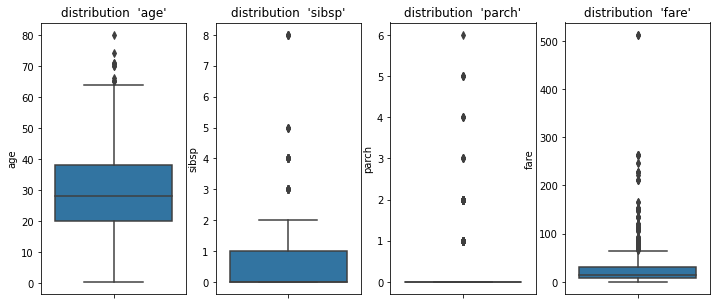

In [8]:
figure, ax_list = plt.subplots(nrows=1, ncols=4)
figure.set_size_inches(12,5)

for i in range(4):
    col = numerical_cols[i]
    sns.boxplot(data=titanic_df, y=col, showfliers=True, ax=ax_list[i])
    ax_list[i].set_title(f"distribution  '{col}'")

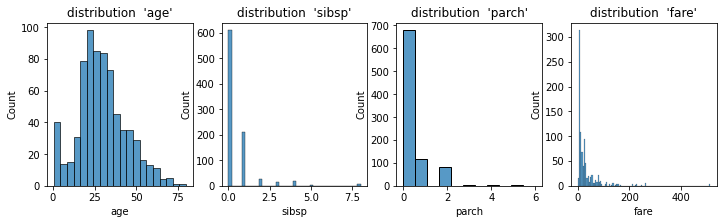

In [9]:
figure, ax_list = plt.subplots(nrows=1, ncols=4)
figure.set_size_inches(12,3)

for i in range(4):
    sns.histplot(data=titanic_df.loc[:, numerical_cols[i]], ax=ax_list[i])
    ax_list[i].set_title(f"distribution  '{numerical_cols[i]}'")

범주형 컬럼들의 분포를 그려봅니다. 범주형이므로 countplot을 통해 각 범주별로 개수를 셀 수 있습니다.  
* 범주형 컬럼이 총 9개 이므로, 3x3 도화지 레이아웃으로 하나씩 그래프를 그려봅니다.
* ax_list_list는 [[], []] 형태의 2차원 리스트 입니다. for 문으로 반복하기 위해 1차원 리스트로 풀어줍니다.
* 1차원 리스트 ax_list가 9개의 도화지 (ax)를 갖도록 풀어서 할당하는데, `.reshape()` 라는 numpy 함수를 사용합니다.

(3, 3)
(9,)


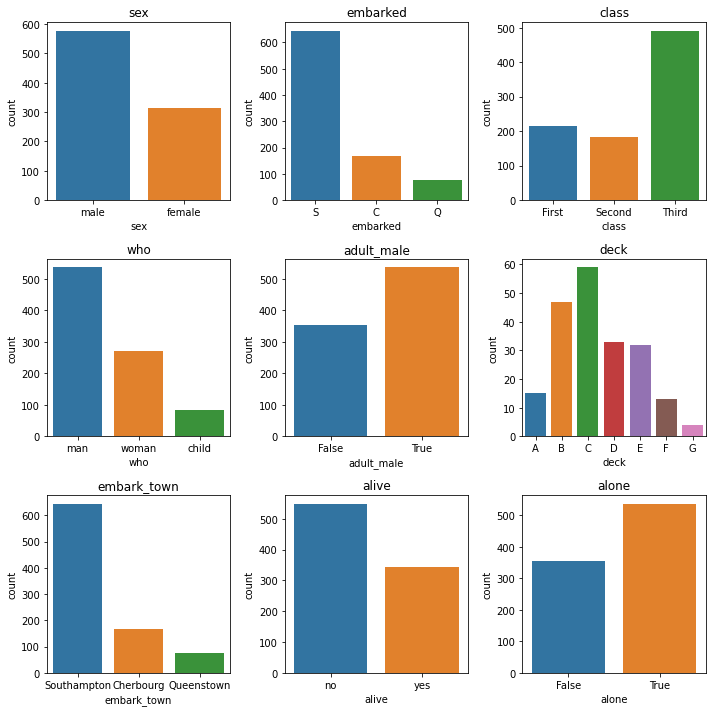

In [10]:
figure, ax_list_list = plt.subplots(nrows=3, ncols=3);
figure.set_size_inches(10,10)

ax_list = ax_list_list.reshape(9)  # 다차원 행렬의 차원을 원하는 모양으로 변경합니다.
print(ax_list_list.shape)
print(ax_list.shape)

for i in range(len(categorical_cols)):
    col = categorical_cols[i]
    sns.countplot(data=titanic_df, x=col, ax=ax_list[i])
    ax_list[i].set_title(col)

plt.tight_layout()

#### 데이터로부터 유의미한 정보 발굴하기  
사실, 여기서부터는 EDA의 범위를 넘어섭니다. 그래도 탑승객의 '생존'에 어떤 것들이 영향을 미치는지 궁금하시죠?  
몇 가지 가설을 세우고 그래프를 그려 '생존'에 영향을 미치는 요인이 무엇인지 살펴봅시다

#### 성별과 생존 여부

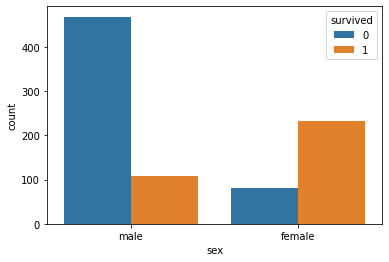

In [14]:
sns.countplot(data=titanic_df, x='sex', hue='survived'); #hue 부분에 우리가 직접 확인하고자 하는 값을 넣어줌. 

#### 좌석 등급과 생존 여부

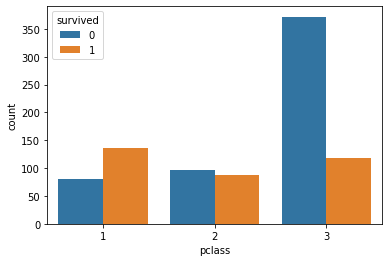

In [15]:
sns.countplot(data=titanic_df, x='pclass', hue='survived'); 

#### 9개의 범주형 분류에 대해, 생존 여부로 그래프 그리기

(3, 3)
(9,)


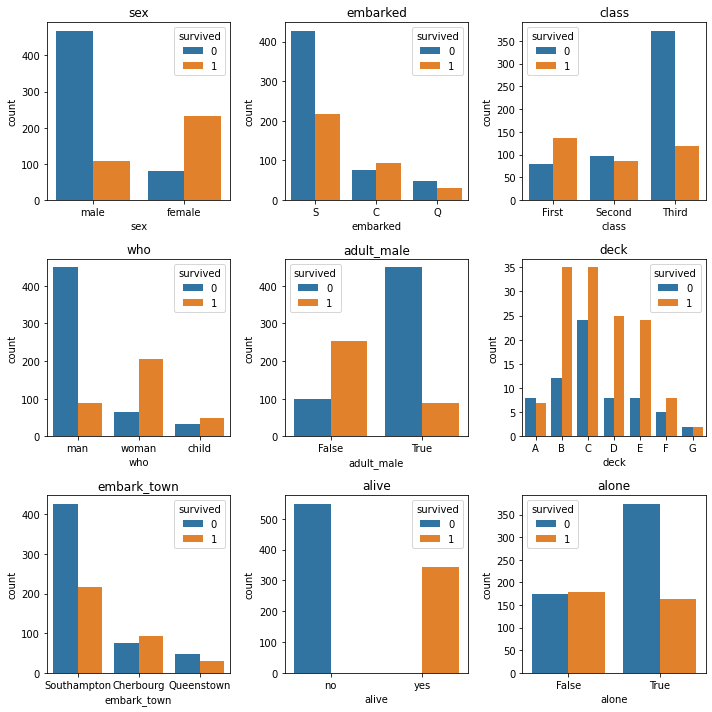

In [13]:
# hue 인자로 'survived' 컬럼을 입력, 각 분류형 데이터 별로 생존/사망 분리하여 살펴보기
figure, ax_list_list = plt.subplots(nrows=3, ncols=3);
figure.set_size_inches(10,10)

ax_list = ax_list_list.reshape(9)
print(ax_list_list.shape)
print(ax_list.shape)

for i in range(len(categorical_cols)):
    col = categorical_cols[i]
    sns.countplot(data=titanic_df, x=col, ax=ax_list[i], hue='survived') 
    ax_list[i].set_title(col)

plt.tight_layout()

[데이터 분석 결과]
- 남성보다 여성의 생존률이 더 높습니다  (남성 > 여성 > 아이)
- 탑승지(embarked)가 C인 경우 생존율이 높습니다
- 1등석 > 2등석 > 3등석 순으로 생존율이 높습니다
- B,D,E 덱 위치의 승객들이 생존율이 높습니다
- 나홀로 승객은 생존율이 낮습니다

##### 생존 여부별로 나이의 히스토그램 그려보기

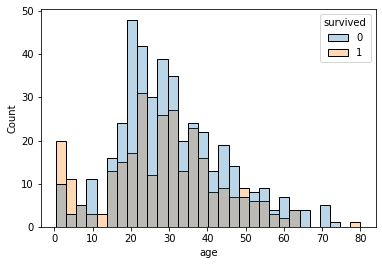

In [16]:
sns.histplot(data=titanic_df, x='age', hue='survived', bins=30, alpha=0.3);

##### 성별과 좌석 등급에 따라, 나이의 boxplot 그려보기

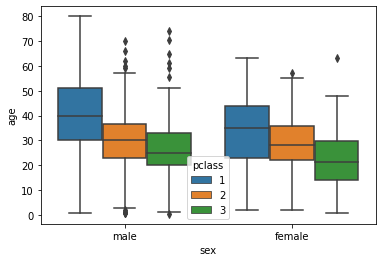

In [17]:
sns.boxplot(data=titanic_df, x='sex', y='age', hue='pclass');

# Part2. Decision Tree로 타이타닉 생존자 예측하기

## 결측치 채우기

In [21]:
titanic_df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          891 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     891 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         891 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [23]:
# numerical value
titanic_df['age'].fillna(titanic_df['age'].mean(), inplace=True) #null걊의 결측치를 채워줌 = fillna함수 사용
# categorical value
titanic_df['deck'].fillna(titanic_df['deck'].describe()['top'], inplace=True)
titanic_df['embarked'].fillna(titanic_df['embarked'].describe()['top'], inplace=True)

In [24]:
titanic_df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.000000,1,0,7.2500,S,Third,man,True,C,Southampton,no,False
1,1,1,female,38.000000,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.000000,0,0,7.9250,S,Third,woman,False,C,Southampton,yes,True
3,1,1,female,35.000000,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.000000,0,0,8.0500,S,Third,man,True,C,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.000000,0,0,13.0000,S,Second,man,True,C,Southampton,no,True
887,1,1,female,19.000000,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,29.699118,1,2,23.4500,S,Third,woman,False,C,Southampton,no,False
889,1,1,male,26.000000,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [25]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
titanic_df['sex'] = le.fit(titanic_df['sex']).transform(titanic_df['sex'])
titanic_df['adult_male'] = le.fit(titanic_df['adult_male']).transform(titanic_df['adult_male'])
titanic_df['alone'] = le.fit(titanic_df['alone']).transform(titanic_df['alone'])
titanic_df['embarked'] = le.fit(titanic_df['embarked']).transform(titanic_df['embarked'])
titanic_df['deck'] = le.fit(titanic_df['deck']).transform(titanic_df['deck'])
titanic_df['who'] = le.fit(titanic_df['who']).transform(titanic_df['who'])

In [26]:
titanic_df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,1,22.000000,1,0,7.2500,2,Third,1,1,2,Southampton,no,0
1,1,1,0,38.000000,1,0,71.2833,0,First,2,0,2,Cherbourg,yes,0
2,1,3,0,26.000000,0,0,7.9250,2,Third,2,0,2,Southampton,yes,1
3,1,1,0,35.000000,1,0,53.1000,2,First,2,0,2,Southampton,yes,0
4,0,3,1,35.000000,0,0,8.0500,2,Third,1,1,2,Southampton,no,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,1,27.000000,0,0,13.0000,2,Second,1,1,2,Southampton,no,1
887,1,1,0,19.000000,0,0,30.0000,2,First,2,0,1,Southampton,yes,1
888,0,3,0,29.699118,1,2,23.4500,2,Third,2,0,2,Southampton,no,0
889,1,1,1,26.000000,0,0,30.0000,0,First,1,1,2,Cherbourg,yes,1


In [27]:
# drop duplicated columns
drop_cols = ["class", "embark_town", "alive"]
titanic_df = titanic_df.drop(drop_cols, axis=1) #중복되는 함수는 drop 함수 활용
titanic_df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,who,adult_male,deck,alone
0,0,3,1,22.000000,1,0,7.2500,2,1,1,2,0
1,1,1,0,38.000000,1,0,71.2833,0,2,0,2,0
2,1,3,0,26.000000,0,0,7.9250,2,2,0,2,1
3,1,1,0,35.000000,1,0,53.1000,2,2,0,2,0
4,0,3,1,35.000000,0,0,8.0500,2,1,1,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,1,27.000000,0,0,13.0000,2,1,1,2,1
887,1,1,0,19.000000,0,0,30.0000,2,2,0,1,1
888,0,3,0,29.699118,1,2,23.4500,2,2,0,2,0
889,1,1,1,26.000000,0,0,30.0000,0,1,1,2,1


# 트레이닝 데이터 준비하기

In [28]:
X = titanic_df.iloc[:,1:]
y = titanic_df['survived']

# 80%는 트레이닝 데이터, 20%는 테스트 데이터로 나눕니다.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [29]:
from sklearn.tree import DecisionTreeClassifier

dt_clf = DecisionTreeClassifier()
dt_clf.fit(X_train, y_train)
y_pred = dt_clf.predict(X_test)

print('예측 정확도: %.2f' % accuracy_score(y_test, y_pred))

예측 정확도: 0.79
